In [1]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
from fractions import Fraction
from scipy.constants import h, hbar, c, epsilon_0, e
from collections import namedtuple
from sympy.physics.quantum.cg import Wigner3j

In [2]:
# Zeeman
mu_B_hbar = 1.4 # MHz/G
g_J = np.array([2.0023010, 0.6668, 1.335]) # 2S, 2P1/2, 2P3/2

# Breit-Rabi
vHFS = 228205260 # HFS for B=0 in MHz
I = 1 # Corespin
g_I = -0.0004476540 # Lande-g Factor for the core
g_e = 2.0023193043737 # Lande-g Factor for electrons
mu_B = 927.400949e-26  # Bohr magneton

# Polarizability
D1 = 446.789634e12 # Hz
D2 = 446.799677e12 # Hz
Delta = D1 - D2 # Hz
Gamma = 2*np.pi*5.8724e6 # linewidth of D1 & D2 in Hz
a_hf = 152.1368407e6 # Hz

colors = ['tab:blue', 'tab:red', 'tab:green', 'gray', 'gray', 'gray']


In [3]:
def zeeman(B, J_, mj_): # B in Gaus, return in MHz
    return mu_B_hbar*g_J[int(J_+1/2)]*mj_*B

# Breit-Rabi formula
def br(B, state): # B in Gaus, return in MHz
    F = get_F(state)
    m_F = get_m_F(state)
    a = (g_e-g_I)*mu_B*B*1e-4/(h*vHFS)
    root = 0
    if(F!=abs(m_F) or F<I+1/2):
        root = np.sqrt(1 + 4*m_F/(2*I+1)*a + a**2)
    else:
        root = 1 + m_F/abs(m_F)*a
    return (-vHFS/(2*(2*I+1)) + g_I*m_F*mu_B*B*1e-4/h + vHFS*(F-1)*root)*1e-6

def plot_e_splitting(B, J_, colors):
    fig, ax = plt.subplots()
    for i, mj_ in enumerate(get_mj(J_)):
        ax.plot(B, zeeman(B, J_, mj_), color=colors[i], label=f'$\\rm m_{{\\,J}}$ = {Fraction(mj_)}')
    plt.xlabel('B [G]')
    plt.ylabel(r'$\Delta\,\nu$ [MHz]')
    plt.title(f'Zeeman splitting for $\\rm 2P_{{{Fraction(J_)}}}$')
    plt.legend()
#     plt.savefig(f'.\\plots\\Zeeman_2P_{2*Fraction(J_)}-2', dpi=160)
    plt.show()
    return

def get_mj(J_):
    arr = []
    for mj_ in np.arange(-J_, J_+1):
        arr.append(mj_)
    return np.array(arr)

def get_F(state):
    if state <= 2:
        return 1/2
    if state > 2:
        return 3/2

def get_m_F(state):
    if state <= 2:
        return -state+3/2
    if state > 2:
        return state-9/2

def freq_to_wavel(freq): # frequency in offset from D2 in Hz, wavelength in nm
    return c/(freq+D2)*1e9

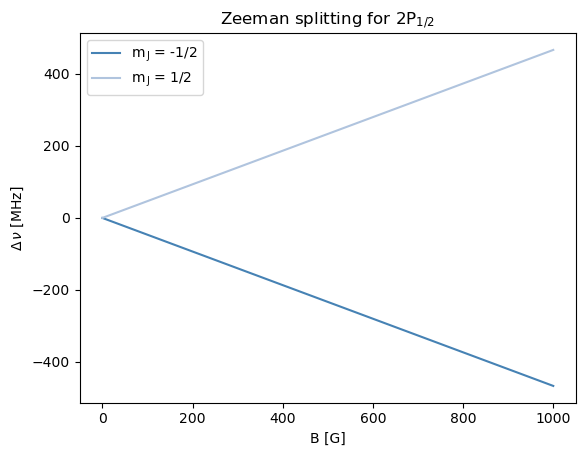

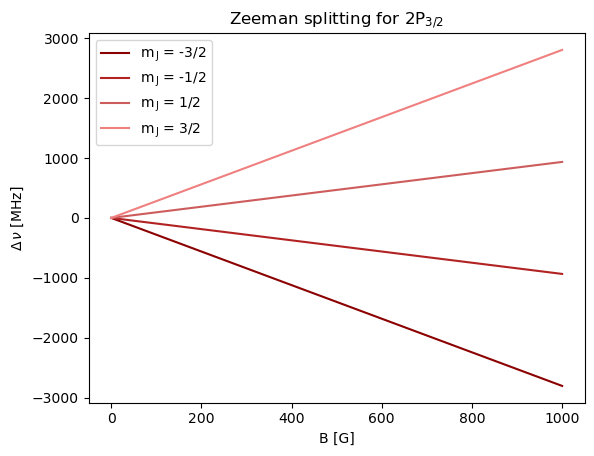

In [4]:
B = np.linspace(0, 1000, 1000) #G
plot_e_splitting(B, J_=1/2, colors=['steelblue', 'lightsteelblue'])
plot_e_splitting(B, J_=3/2, colors=['darkred', 'firebrick', 'indianred', 'lightcoral'])

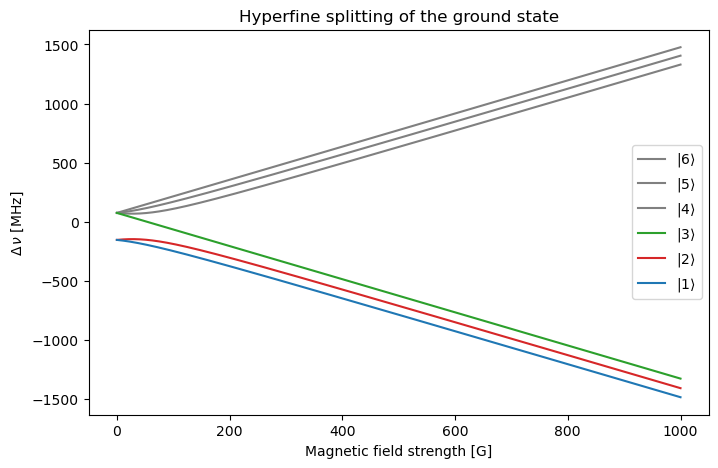

In [5]:
B = np.linspace(0, 1000, 1000) #G
HFS = namedtuple('HFS', 'v state')
data = []
for state in range(1,7):
    data.append(HFS(br(B, state), state))

fig, ax = plt.subplots(figsize=(8, 5))
for n in reversed(range(6)):
    ax.plot(B, data[n].v, color=colors[n], label=f'$|{data[n].state}\\rangle$')
ax.set_xlabel('Magnetic field strength [G]')
ax.set_ylabel('$\\Delta\\,\\nu$ [MHz]')
ax.set_title('Hyperfine splitting of the ground state')
ax.legend(loc='center right')
# plt.savefig('.\\plots\\Zeeman_2S', dpi=320)
plt.show()

In [6]:
b=1201

In [7]:
br(b, 3)-br(b, 2)

80.33420974108935

In [8]:
br(b, 1)-br(b, 2)

-76.66595205808244

In [10]:
br(832, 3) - br(832, 2)

81.70759653830987